<a href="https://colab.research.google.com/github/Wilkingc/ddc-datascience/blob/main/Project_1_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction Data Analysis



## Project 1



Wilking Chali Alphonse 07/10/2024



## Problem Definition


In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

 This is a binary clasification problem since each customer either did or didn't make a transaction. This project will use Naive Bayes classification.

## Data Collection / Sources


### Data Overview

This data comes from: https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv.

- We have a target column that defines whether a customer made a transaction or not. It is One hot encoded (0-1), which makes it very straight forward to undestand.

- We have two descriptive columns that we can consider as index identifiers.

- We have 49 variable columns which we well be using to iterate over to better understand our data.


### Imports

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### File Paths

File paths to test and train the data.

In [ ]:
url = ' https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
train_data = url
test_data = url

### Load Data

Here we load the data to take an look at it's structure and make sure everything looks good.

In [ ]:
transaction = pd.read_csv(train_data)
transaction.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transaction.shape

(180000, 53)

We can see that our data looks good, now we can move to the next step.

## Data Cleaning

Next we will:
- Take a look at the last few rows of our dataset to double check everything looks good.

- Transpose our data to better understand it's structure.

- Check the unique properties / values to spot any redundancy.


In [ ]:

transaction.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
transaction.nunique()

,0
Unnamed: 0,180000
ID_code,180000
target,2
var_0,90443
var_1,103081
var_2,83041
var_3,37907
var_4,48476
var_5,9500
var_6,108599


In [ ]:
transaction.transpose()

,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
ID_code,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,...,train_179990,train_179991,train_179992,train_179993,train_179994,train_179995,train_179996,train_179997,train_179998,train_179999
target,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.558,16.1071,12.5088,...,10.0158,11.0303,10.3811,8.6353,15.7964,8.9112,8.2722,12.4902,8.4894,11.6252
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743,...,-6.2072,-4.4768,-1.6522,-3.9536,-1.0888,-4.49,7.1923,-2.9379,0.7048,3.3959
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.608,9.3494,13.8776,13.9307,8.896,...,12.5506,12.4445,10.5636,12.4717,17.2377,11.3795,16.73,6.5901,11.1518,11.5558
var_3,5.1187,5.6208,6.9427,5.8428,5.9405,4.5322,6.1961,5.689,4.4514,6.0637,...,5.8199,4.1073,5.7018,4.0501,4.1423,5.4164,4.9698,4.7242,4.637,4.2003
var_4,5.747,8.0851,5.9525,8.245,7.6784,5.979,7.9232,7.1971,9.0827,7.9682,...,9.1829,7.5998,9.8771,8.6818,7.7214,8.3309,5.4907,9.1423,8.1321,7.4666
var_5,14.0137,14.0239,14.1929,13.8463,13.8481,13.638,14.1629,14.2919,14.0654,13.9639,...,13.8532,13.812,14.193,14.2331,14.1565,14.1869,14.0238,13.9133,14.2921,13.7381
var_6,0.5745,8.4135,7.3124,11.9704,7.8895,1.2589,13.3058,10.9699,-3.0572,0.8071,...,-1.2734,3.6838,2.2785,13.1255,6.82,12.8219,11.9933,12.2314,6.9582,12.959


### Drop Columns

First, we'll drop a couple of columns that don't look useful.  

- Unnamed:0 is just an index column assigned by counting up.  This won't help our model so we'll drop this column.

- The ID code isn't going to help our predictions so we'll drop the ID code column also.  

In [ ]:
transaction1 = transaction.copy()
transaction1.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transaction1.drop(transaction1.columns[0], axis = 1, inplace = True)
transaction1.drop('ID_code', axis = 1, inplace = True )

In [ ]:
transaction1.nunique()

,0
target,2
var_0,90443
var_1,103081
var_2,83041
var_3,37907
var_4,48476
var_5,9500
var_6,108599
var_7,129702
var_8,130208


Let's check and make sure the columns are gone.

In [ ]:
transaction1.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


### Check for Null values

In [ ]:
transaction1.isna().sum()

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0


Looks like everything is good!

### Check target value

In [ ]:
transaction1['target'].value_counts(dropna = False)

,count
target,
0,161960
1,18040


From here we can see that based on the count of 0 and 1 our data is not balanced, which could be a factor for our analysis later on.

In [ ]:
transaction1['target'].describe()

,target
count,180000.000000
mean,0.100222
std,0.300297
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Exploratory Data Analysis




### Feature correlation

Let's just take a quick visual look at what our feature correlations are.  

We expect the negative transactions to be substantially higher than the positives because of the distribution of values, but this correlation might be important as well.

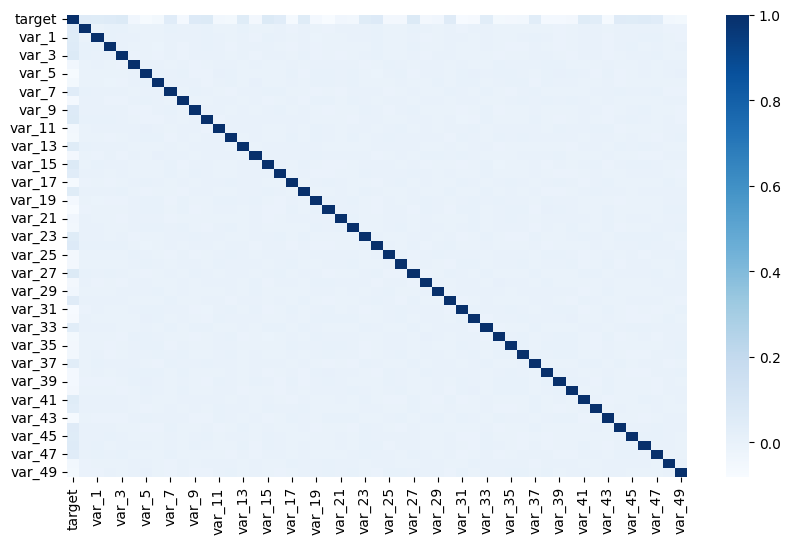

In [ ]:
corr = transaction1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot = False);

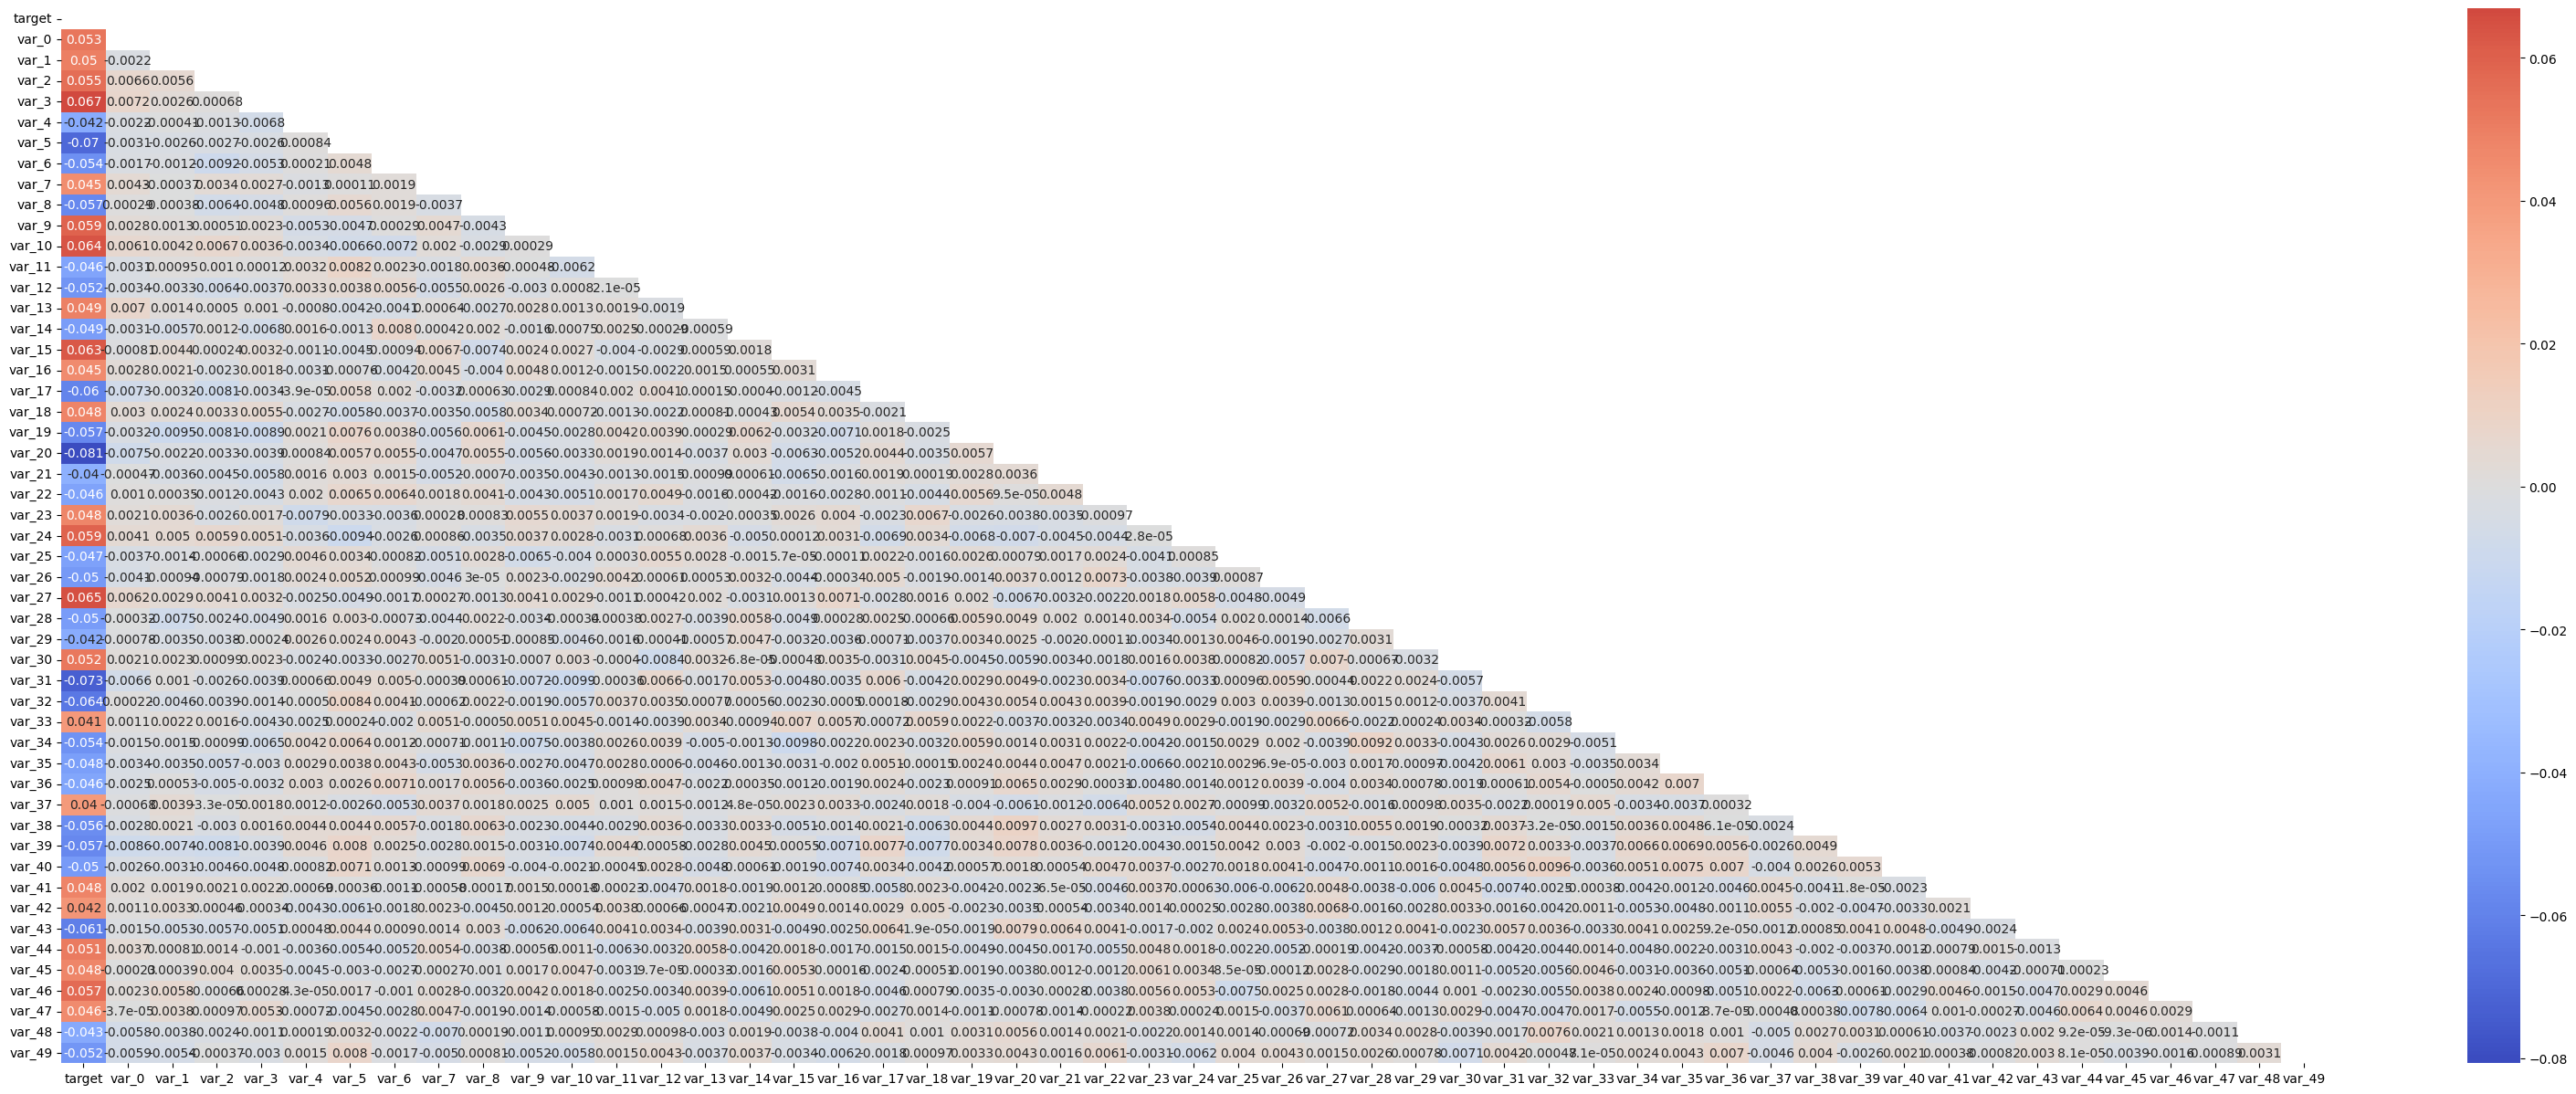

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(40, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.show()

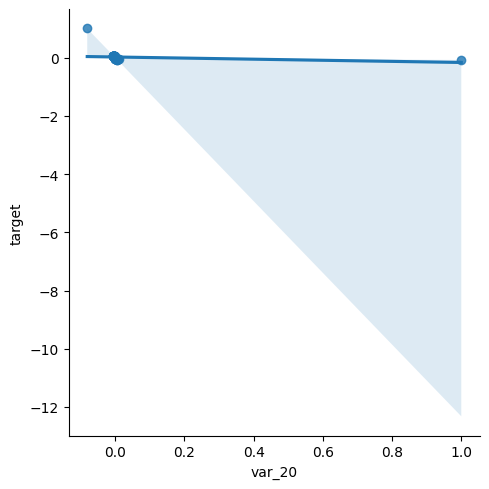

In [ ]:
sns.lmplot(x='var_20', y='target', data=corr)
plt.show()

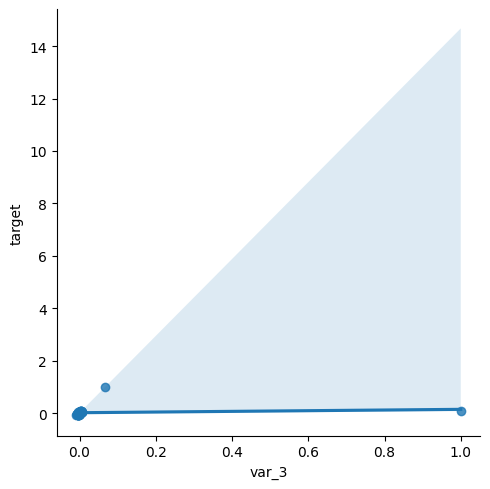

In [ ]:
sns.lmplot(x='var_3', y='target', data=corr)
plt.show()

When looking at these graphs we can see that our target is positively correlated with var_3 and negatively correlated with var_20.

In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked != 1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [ ]:
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)

,0
var_20,0.080689
var_31,0.073296
var_5,0.070015
var_3,0.066924
var_27,0.064868
var_32,0.063871
var_10,0.063565
var_15,0.062887
var_43,0.061291
var_17,0.059906


Next, let's look at which pairs of features are most correlated.  Because negative correlation could also be of interest, we will take the absolute value, `abs()`.

In [ ]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

target  var_20    0.080689
var_20  target    0.080689
var_31  target    0.073296
target  var_31    0.073296
        var_5     0.070015
                    ...   
var_43  var_18    0.000019
var_39  var_41    0.000018
var_41  var_39    0.000018
var_45  var_48    0.000009
var_48  var_45    0.000009
Length: 2550, dtype: float64

In [ ]:
corr_pair[::2].head(15)

target  var_20    0.080689
var_31  target    0.073296
target  var_5     0.070015
var_3   target    0.066924
var_27  target    0.064868
var_32  target    0.063871
target  var_10    0.063565
var_15  target    0.062887
target  var_43    0.061291
        var_17    0.059906
var_24  target    0.059306
target  var_9     0.059227
        var_8     0.057378
var_39  target    0.057373
var_19  target    0.057320
dtype: float64

We see that:
- target strongest correlation is with var_20.
- Also we notice a based on the analysis over the absolute values, our target is mostly correlated with negative variables.
- The correlation with positive values show a very light difference between each other.

In [ ]:
corr = transaction1.corr().abs()
corr = corr.melt(
    ignore_index = False,
    var_name = 'feature',
    value_name = 'correlation',
    )
corr = corr[corr['correlation'] != 1]
corr.sort_values(
    'correlation',
    inplace=True,
    ascending=False,
    )
corr[::2].head(5)

,feature,correlation
var_20,target,0.080689
target,var_31,0.073296
var_5,target,0.070015
target,var_3,0.066924
target,var_27,0.064868


## Data Processing




### Gaussian Naive Bayes Model


Next we will separate our features and target.

In [ ]:
y = transaction1['target'].copy()
X = transaction1.drop('target', axis = 1, inplace = False)

Creat a GNB model

In [ ]:
gnb = GaussianNB()

We will train our model using the training subset data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"

Number of mislabeled points out of a total 36000 points : 3283


In [ ]:
1-3283/36000

0.9088055555555555

We see a 0.90 corretalion % based on our model, but this was expected based on the distribution of our data as mentioned in the data cleaning stage.

### Cross-Validation

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

Then we will run the functions.

In [ ]:
accuracy_scores = cross_validate(X, y, 10)
print(round(accuracy_scores.mean(), 5))

0.91139


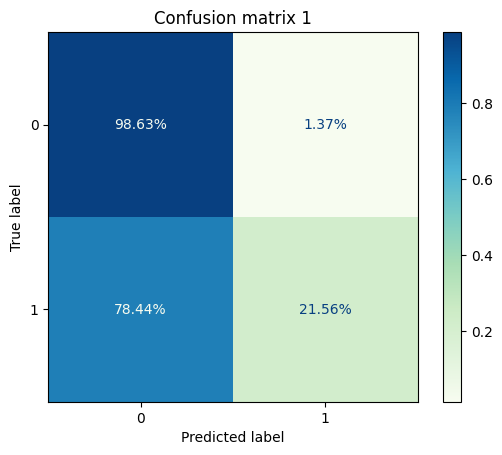

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix 1') ;
plt.savefig('confusion_M.png')

The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). We will remove enough non-successful transaction rows so that the remaining training data is 50%/50% split between successful and non-successful transactions.

In [ ]:
transa = transaction1.copy()
transa_zeros = transa[transa['target'] == 0]
transa_ones = transa[transa['target'] == 1]

In [ ]:
number_to_remove = 143920
transa_zeros_reduced = transa_zeros.sample(len(transa_zeros) - number_to_remove)
transa_new = pd.concat([transa_zeros_reduced, transa_ones], ignore_index = True)

Let's take a closer look at our even dataset.

In [ ]:
transa_new['target'].value_counts()

,count
target,
0,18040
1,18040


We will repeat the Cross-Validation process on our new sampled dataset.

In [ ]:
C = transa_new['target'].copy()
D = transa_new.drop('target', axis = 1, inplace = False)

In [ ]:
def cross_validate(x, Y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    C_train, D_test, y_train, y_test = model_selection.train_test_split(D, C, test_size = 0.2)
    model_split_cv.fit(C_train, y_train)
    y_split_pred = model_split_cv.predict(D_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy = cross_validate(C, D, 500)
print(round(accuracy_scores.mean(), 3))

0.911


In [ ]:
C_train, D_test, y_train, y_test = train_test_split(D, C, test_size=0.20, random_state=0)
gnb.fit(C_train, y_train)
y_pred = gnb.predict(D_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (D_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"


Number of mislabeled points out of a total 7216 points : 1807


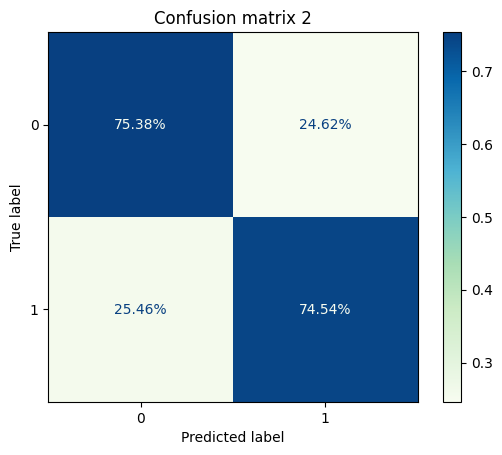

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    D_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix 2') ;
plt.savefig('confusion_matrix.png')

We can see that for our even distributed target dataset our accuracy score is 74% unlike our previous model.

## Data Visualization





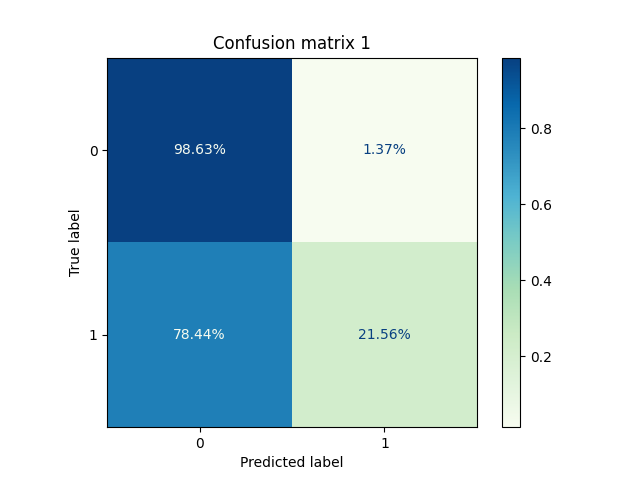

In [ ]:
Image('confusion_M.png')

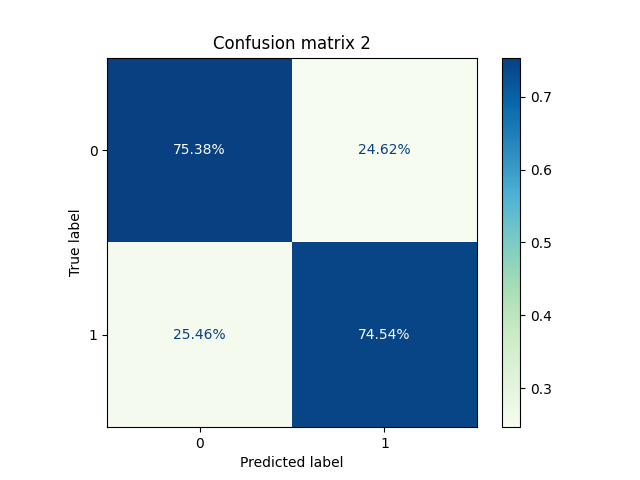

In [ ]:
Image('confusion_matrix.png')

We can see the differences between our skew dataset and our even dataset. Our second model performs much better.

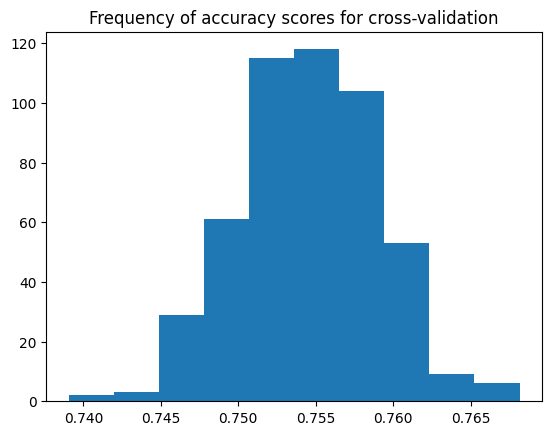

In [ ]:
plt.hist(accuracy)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3599
           1       0.75      0.75      0.75      3617

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



## Conclusion

### Important features


### Model performance

- Using Naive Bayes resulted in an average accuracy of 74% in our cross-validation tests.
- Several of our features are correlated with each other so this may not be an ideal method to use.
- Our model did better at predicting when a customer did not make transaction than when they did.


### Future exploration/ Next steps

- It would be worth exploring alternative models like a random forest and see how that did compared to Naive Bayes.  
- It is important to define if this data colected by credit bureaus actually reflects this customer transaction behaviour to avoid bias.
